#Machine Learning Models

##Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Read Data from CSV

In [5]:
#read certain data columns from cses4_cut.csv
dataset = np.array(pd.read_csv('cses4_cut.csv'))
X = dataset[:,1:-1]
N = len(X)

#read the labels column from csv
Y = np.array(pd.read_csv('cses4_cut.csv', usecols=['voted']))
print(X.shape)

## obtain the labels in the form of 1-hot encoding using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Y = encoder.fit_transform(Y).toarray() 
print(Y)

(12451, 31)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


##Feature Selecetion with Chi Square Method

In [6]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)
X =test.fit_transform(X, Y)
fit.scores_


array([1.99145597e-02, 1.52595916e+02, 2.35065634e+02, 3.34961755e+00,
       1.55618389e+02, 3.02463042e+02, 3.01992033e+02, 3.03929085e+02,
       1.21612428e+02, 1.80139675e+04, 3.60985103e+02, 7.86810805e+02,
       7.59160769e+02, 6.21000484e+03, 3.97429125e+03, 9.93194218e+01,
       2.25438584e+02, 2.12502710e+02, 1.01133731e+01, 2.36160106e+04,
       9.67999695e+03, 7.72843289e+03, 9.32369908e+00, 4.25074084e+02,
       1.37612525e+05, 4.86518548e+04, 8.30082095e+03, 4.18624414e+04,
       1.12743612e+04, 1.14522438e+02, 4.58848059e+03])

##Dimensionality Reduction Using PCA

In [7]:
def reduce_dimentions(X):
  from sklearn.decomposition import PCA # 1. Choose the model class
  model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
  model.fit(X) # 3. Fit to data. Notice y is not specified!
  X = model.transform(X)
  return X


##Split Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)

# reduce dimensionality with PCA for train and test sets
X_train = reduce_dimentions(X_train)
X_test= reduce_dimentions(X_test)

##Plot Training Dataset

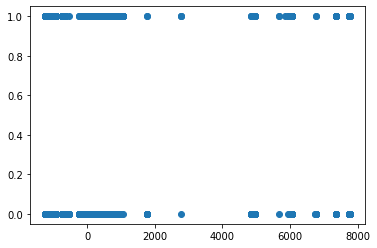

In [9]:
plt.scatter(X_train, Y_train)
plt.show()


##Gaussian Naive Bayes Classifier

In [10]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(X_train, Y_train[:, 1]) # 3. fit model to data
Y_model = model.predict(X_test)

##GaussianNB Accuracy Score


In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test[:,1], Y_model)
print(accuracy)

0.8113207547169812


##Confusion Matrix for GaussianNB





In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test[:,1], Y_model)
print("The Confusion Matrix for GaussianNB:\n", mat)

The Confusion Matrix for GaussianNB:
 [[   0  464]
 [   0 2027]]


##KN Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

def tune_KNN(N, k_values):
  accuracies = []
  for k in k_values:
    # instantiate kNN with given neighbor size k
    knn = KNeighborsClassifier(n_neighbors=k)
    # run cross validation for a given kNN setup
    # I have setup n_jobs=-1 to use all cpus in my env.
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy', n_jobs=-1)
    accuracies.append(scores.mean())
  return accuracies


k_values = [i for i in range(1, 1000)]
accuracies = tune_KNN(N, k_values)
print(accuracies)

model = KNeighborsClassifier(n_neighbors= np.argmax(accuracies))
model.fit(X_train, Y_train)
y_model = model.predict(X_test)
Score = accuracy_score(Y_test, y_model)
print(Score)







[0.744277108433735, 0.6236947791164659, 0.7844377510040161, 0.7139558232931728, 0.8001004016064257, 0.7595381526104418, 0.8089357429718878, 0.7759036144578313, 0.8123493975903614, 0.7911646586345382, 0.8172690763052209, 0.7998995983935743, 0.8206827309236948, 0.8095381526104418, 0.8207831325301205, 0.8089357429718875, 0.820281124497992, 0.8133534136546183, 0.8206827309236948, 0.8111445783132529, 0.8203815261044177, 0.8123493975903614, 0.8206827309236948, 0.8145582329317269, 0.822289156626506, 0.8132530120481928, 0.8213855421686747, 0.8147590361445782, 0.821987951807229, 0.8160642570281125, 0.8221887550200803, 0.8177710843373495, 0.8218875502008032, 0.8192771084337348, 0.8220883534136545, 0.8191767068273093, 0.8220883534136545, 0.8193775100401606, 0.821987951807229, 0.8205823293172692, 0.8225903614457832, 0.8186746987951807, 0.8223895582329318, 0.8197791164658634, 0.8231927710843374, 0.8193775100401606, 0.8218875502008032, 0.8180722891566263, 0.8231927710843374, 0.8215863453815262, 0.82

Text(0, 0.5, 'Cross-Validated Accuracy')

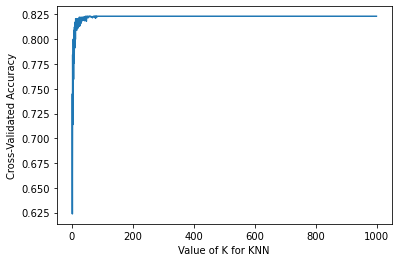

In [ ]:
plt.plot(k_values, accuracies)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

##LogisticRegression Optimization by GridSearchCV





In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
param_grid = [
              {'penalty' : ['l2', 'elasticnet', 'none'],
               'C' : np.logspace(-8,8,20),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               'max_iter' : [100,1000, 2500, 5000]
              }]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)
clf_best = clf.fit(X_train, Y_train[:,1])

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 3402 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  1.2min finished


In [14]:
clf_best.best_estimator_

LogisticRegression(C=1e-08, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
best_score = clf_best.score(X_train, Y_train[:,1])
best_param = clf_best.best_params_

##Use of LogisticRegression 

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, C=best_param.get('C'), penalty=best_param.get('penalty'), solver=best_param.get('solver'), max_iter=best_param.get('max_iter'))
model.fit(X_train, Y_train[:,1])
Y_model = model.predict(X_test) 
accuracy = accuracy_score(Y_test[:,1], Y_model)
print(accuracy)

0.8137294259333601
